In [ ]:
#Libraries data structures, matrix/ arithimatic operations, and plotting etc.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.text import FreqDistVisualizer

# libraries for preprocessing of our text data
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer

#from sentence_transformers import SentenceTransformer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# libraries for model building
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import multilabel_confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Loading train data
df_train = pd.read_csv("/content/drive/MyDrive/ML Project Dataset/train.csv",on_bad_lines="skip")
# Loading test labels
df_test_label = pd.read_csv("/content/drive/MyDrive/ML Project Dataset/test_labels.csv",on_bad_lines="skip")
# Loading test features
df_test_feature = pd.read_csv("/content/drive/MyDrive/ML Project Dataset/test.csv",on_bad_lines="skip")

In [ ]:
# merging data frame using id as key with intersection method.
df_test = df_test_feature.merge(df_test_label, on='id', how='inner')

In [ ]:
# Updating df_test by keeping only rows whose label is not negative one.
df_test = df_test[df_test['toxic'] != -1]

In [ ]:
# For showing the data that df_test contains
df_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
df_test

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153150,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
153151,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
153154,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
153155,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [ ]:
print(df_train.dtypes,"\n\n",df_train.dtypes)

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object 

 id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object


**Number of Comments in Each category in Train Data** <br>
15294 comments are labeled as 'toxic' <br>
1595 comments are labeled as 'severe toxic' <br>
8449 comments are labeled as 'obscene' <br>
478 comments are labeled as 'threat' <br>
7877 comments are labeled as 'insult' <br>
1405 comments are labeled as 'indentity hate' <br>

In [ ]:
df_labels = df_train.drop(['id', 'comment_text'], axis=1)
counts = []
categories = list(df_labels.columns.values)

for i in categories:
    counts.append((i, df_labels[i].sum()))

df_stats = pd.DataFrame(counts, columns=['labels', 'number_of_comments'])
df_stats

,labels,number_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


Text(0.5, 0, 'Labels')

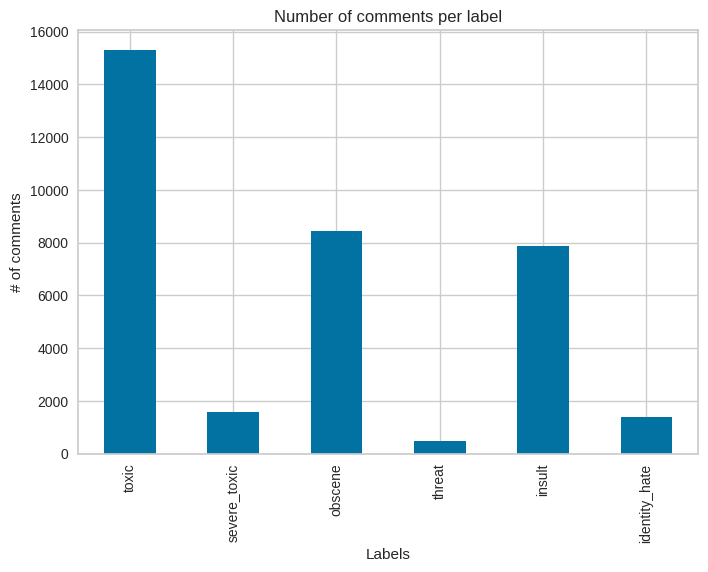

In [ ]:
# just plotting above calculated number of comments in each label

df_stats.plot(x='labels', y='number_of_comments', kind='bar', legend=False)
plt.title("Number of comments per label")
plt.ylabel('# of comments')
plt.xlabel('Labels')

**How many comments have multi labels?**

our label is in binary form so here we are just counting our label in each comment.

A comment have not assigned any class: All label contain 0 = 143346 comments <br>
A comment have assigned one class: only one label contain 1 = 6360 comments <br>
A comment assigned two classes: two labels contain 1 = 3480 comments <br>
A comment assigned to three classes: three label contain 1 = 4209 comments<br>
A comment assigned to four classes: four label contain 1 = 1760 comments <br>
A comment assigned to five classes: five label contain 1 = 385 cooments <br>
A comment assigned to all six classes: all six label contain 1 = 31 comments <br><br>
if we add all these comments we get our count of total comments in our <br> train dataset and that is = 159571 comments

Text(0.5, 0, '# of categories')

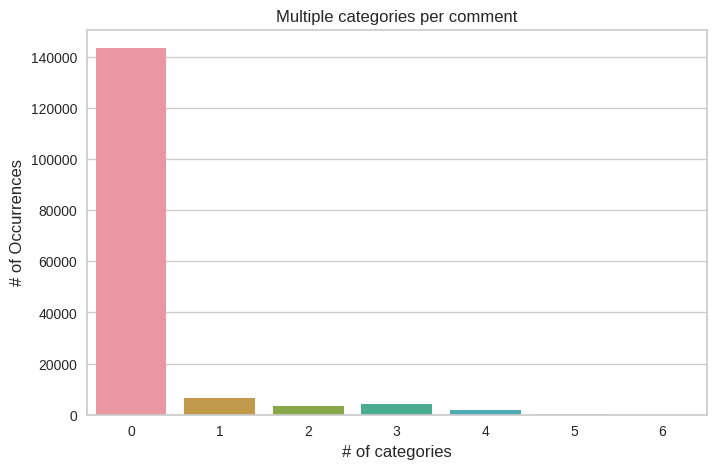

In [ ]:
rowsums = df_train.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()

plt.figure(figsize=(8,5))
ax = sns.barplot(x=x.index, y=x.values)
plt.title("Multiple Categories per Comment")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('No. of categories', fontsize=12)

In [ ]:
x

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

**The Distribution of the Number of Character in Comment's text**

Just counting the length of each comment in Train dataset <br>
created 100 bin from 0 to 5000 range plot those length <br>
almost all data is in the range of 500 words <br>
some outlier that are reaching to 5000 words

<Axes: >

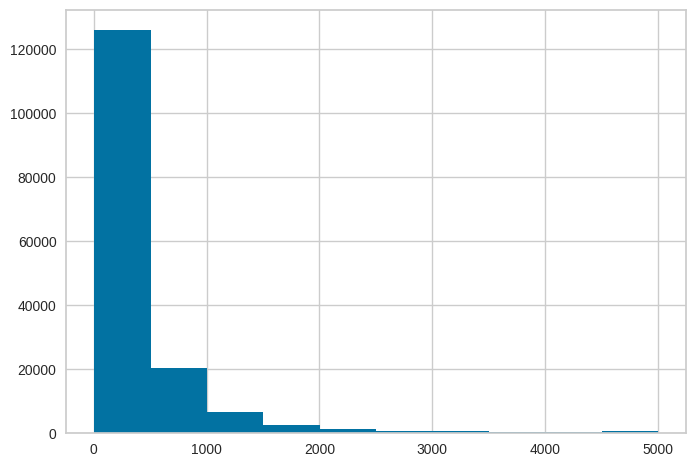

In [ ]:
lens = df_train.comment_text.str.len()
lens.hist()

No Missing data in both Train and Test data.

In [ ]:
print('Number of missing data:')
print("\nTrain Data:\n",df_train.isnull().sum())
print("\nTest Data:\n",df_test.isnull().sum())

Number of missing data:

Train Data:
 id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Test Data:
 id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


**Checking Frequncy of Data Before Preprocessing**<br>
As you see in the below figure that almost all tokens are stopwords, which can negatively effect model decisions. So we will preprocess our data to make our model more robust.

In [ ]:
# using TfidVectorizer to get matrix of TF IDF features
vectorizer = TfidfVectorizer()
vectorised_train_documents = vectorizer.fit_transform(df_train["comment_text"])

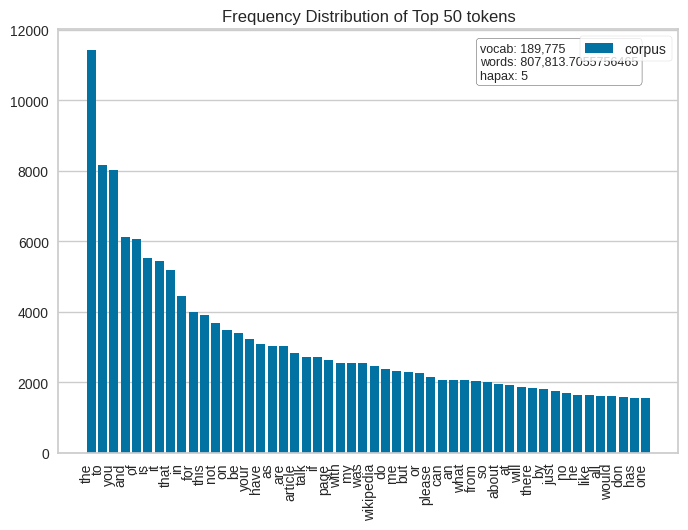

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [ ]:
features = vectorizer.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(vectorised_train_documents)
visualizer.show()

# Text Cleaning

In [ ]:
pattern = r'https?://\S+'

# Use the str.replace method with the regular expression pattern
df_train['comment_text'] = df_train['comment_text'].str.replace(pattern, '', regex=True)
df_test['comment_text'] = df_test['comment_text'].str.replace(pattern, '', regex=True)

In [ ]:
"""apply function will itertively go over each comment text
and send to remove_non_alphanumeric(text) which will remove
every thing except alphanumeric and spaces"""

def remove_non_alphanumeric(text):
    cleaned_text = ''.join(char for char in text if char.isalnum() or char.isspace())
    return cleaned_text

df_train['comment_text'] = df_train['comment_text'].apply(remove_non_alphanumeric)
df_test['comment_text'] = df_test['comment_text'].apply(remove_non_alphanumeric)

## Remove Punctuation
apply function will itertively go over each comment text and send to
remove_punct which will remove all punction marks available in string.punctuation package

In [ ]:
# function to remove punctuation using string.punctuation package
def remove_punct(text):
  text = "".join([char for [char] in text if char not in string.punctuation])
  text = re.sub(r'\n', ' ', text)
  return text

In [ ]:
df_train['comment_text'] = df_train['comment_text'].apply(remove_punct)
df_test['comment_text'] = df_test['comment_text'].apply(remove_punct)

## Lowercasing

In [ ]:
# String lower method will convert the text of both training and testing in each comment to lower case
df_train['comment_text'] = df_train['comment_text'].str.lower()
df_test['comment_text'] = df_test['comment_text'].str.lower()

## StopWord Removal

In [ ]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df_train['comment_text'] = df_train['comment_text'].apply(remove_stopwords)
df_test['comment_text'] = df_test['comment_text'].apply(remove_stopwords)

## Lemmatization and Stemming

In [ ]:

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df_train['comment_text'] = df_train['comment_text'].apply(lemmatize_text)
df_test['comment_text'] = df_test['comment_text'].apply(lemmatize_text)

In [ ]:
stemmer = LancasterStemmer()

def stemming_text(text):

    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]

    return ' '.join(stemmed_words)

df_train['comment_text'] = df_train['comment_text'].apply(stemming_text)
df_test['comment_text'] = df_test['comment_text'].apply(stemming_text)

## Splitting the Data into Features and Labels

In [ ]:
# Extracting the features and labels from data
X_train = df_train['comment_text']
X_test = df_test['comment_text']

y_train = df_train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]
y_test = df_test[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

# Feature Engineering

In [ ]:
# using TfidVectorizer to get matrix of TF IDF features
vectorizer = TfidfVectorizer()
X_vectorised_train = vectorizer.fit_transform(X_train)
X_vectorised_test = vectorizer.transform(X_test)

Both test and train features is same

In [ ]:
X_vectorised_train.shape,X_vectorised_test.shape

((159571, 232661), (63978, 232661))

checking Frequncy of data after preprocessing.<br>
Now you can see some usefull words as top token

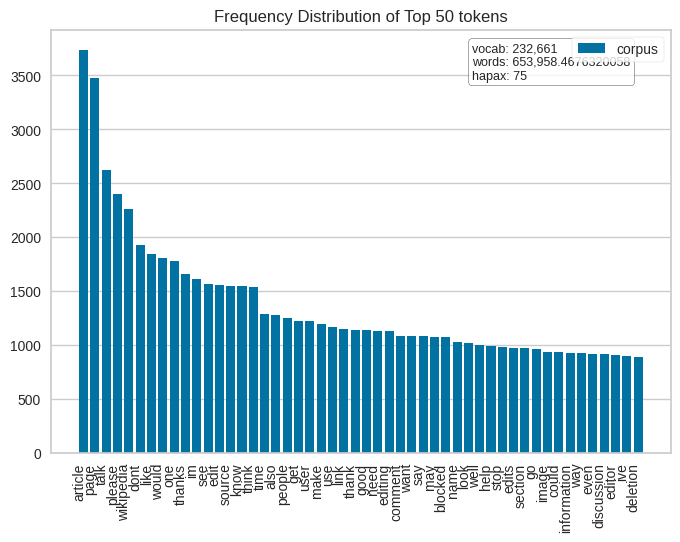

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [ ]:
from yellowbrick.text import FreqDistVisualizer
features = vectorizer.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(X_vectorised_train)
visualizer.show()

# Building ML Model

In [ ]:
# classifier = MultiOutputClassifier(LogisticRegression(max_iter=1000))
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
# passing vectorized data to the fit method of OneVsRestClassifier
classifier.fit(X_vectorised_train, y_train)
# Calling predict method of Classifier and passing feature vector of the test data
predictions = classifier.predict(X_vectorised_test)
# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print("ROC AUC score: ",roc_auc_score(y_test, predictions))
# calculating F1 score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1 Score: {f1}")
# Creating confusion matrix
confusion_matrices = multilabel_confusion_matrix(y_test, predictions)
# Printing confusion matrix
for i, label in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    print(f"Confusion Matrix for {label}:\n{confusion_matrices[i]}\n")

Accuracy: 0.8976679483572478
ROC AUC score:  0.7149936124625977
F1 Score: 0.6356244375900272
Confusion Matrix for toxic:
[[55650  2238]
 [ 1808  4282]]

Confusion Matrix for severe_toxic:
[[63419   192]
 [  247   120]]

Confusion Matrix for obscene:
[[59540   747]
 [ 1374  2317]]

Confusion Matrix for threat:
[[63730    37]
 [  168    43]]

Confusion Matrix for insult:
[[59836   715]
 [ 1609  1818]]

Confusion Matrix for identity_hate:
[[63180    86]
 [  530   182]]



In [ ]:
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')


print(f"Precision: {precision}")
print(f"Recall: {recall}")
# printing classification report
print(classification_report(
    y_test,
    predictions,
    output_dict=False,
    target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
))

Precision: 0.6889551667386238
Recall: 0.6043592219616499
               precision    recall  f1-score   support

        toxic       0.66      0.70      0.68      6090
 severe_toxic       0.38      0.33      0.35       367
      obscene       0.76      0.63      0.69      3691
       threat       0.54      0.20      0.30       211
       insult       0.72      0.53      0.61      3427
identity_hate       0.68      0.26      0.37       712

    micro avg       0.69      0.60      0.64     14498
    macro avg       0.62      0.44      0.50     14498
 weighted avg       0.69      0.60      0.64     14498
  samples avg       0.06      0.06      0.06     14498



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


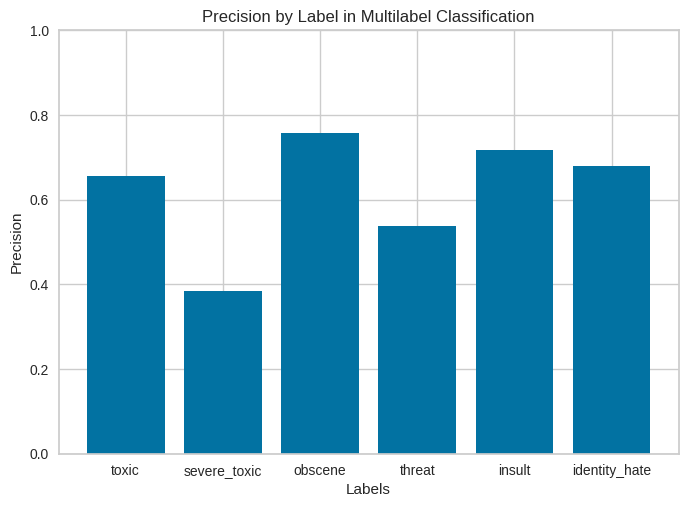

In [ ]:
# Calculating precision
precision_per_label = precision_score(y_test, predictions, average=None)

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

plt.bar(labels, precision_per_label)
plt.xlabel('Labels')
plt.ylabel('Precision')
plt.title('Precision by Label in Multilabel Classification')
plt.ylim(0, 1)
plt.show()

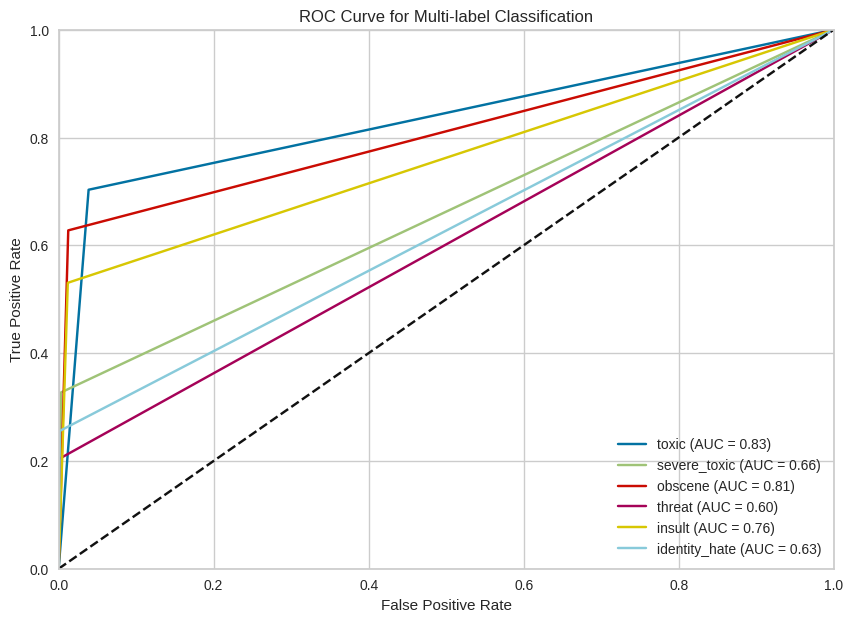

In [ ]:
# Compute ROC curve and ROC area for each class
y_test_ = np.array(y_test)
fpr = dict() # Dictionary for false positive rate
tpr = dict() # Dictionary for true positive rare
roc_auc = dict() # Dictionary for storing values of auc for the given values of fpr and tpr

for i in range(len(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], predictions[:, i])
    # Calculating values of auc for the given values of fpr and tpr
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 7))
for i, label in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    plt.plot(fpr[i], tpr[i], label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0]) # Calculating values of auc for the given values of fpr and tpr
plt.ylim([0.0, 1.0]) # Setting y axis limits from 0 to 1
plt.xlabel('False Positive Rate') # X label
plt.ylabel('True Positive Rate') # Y label
plt.title('ROC Curve for Multi-label Classification')  # Title of the figure
plt.legend(loc="lower right") # Defing legend position
plt.show()


Testing Our Model with some comment

In [ ]:
sentences = [
    "You are always so studpid idiot!",
    "I can't stand your rubbish behaviour , bloody retarted.",
    "I appreciate your shit feedback.",
    "I hope you are doing well"
]

sentences_vectorised = vectorizer.transform(sentences)

predictions = classifier.predict(sentences_vectorised)

labels_list = ['toxic', 'severe_toxic', 'obscene','threat', 'insult', 'identity_hate']

In [ ]:
for n in range(4):
  print("Sentence: ",sentences[n])
  result = dict(zip(labels_list, predictions[n]))
  print(f"Predictions: {result}\n")

Sentence:  You are always so studpid idiot!
Predictions: {'toxic': 1, 'severe_toxic': 0, 'obscene': 0, 'threat': 0, 'insult': 1, 'identity_hate': 0}

Sentence:  I can't stand your rubbish behaviour , bloody retarted.
Predictions: {'toxic': 1, 'severe_toxic': 0, 'obscene': 0, 'threat': 0, 'insult': 0, 'identity_hate': 0}

Sentence:  I appreciate your shit feedback.
Predictions: {'toxic': 1, 'severe_toxic': 0, 'obscene': 1, 'threat': 0, 'insult': 0, 'identity_hate': 0}

Sentence:  I hope you are doing well
Predictions: {'toxic': 0, 'severe_toxic': 0, 'obscene': 0, 'threat': 0, 'insult': 0, 'identity_hate': 0}

